# Micro-Credit Defaulter Model

### Problem Statement: 
    
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

### Exercise:
    
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

# Importing the libraries:

In [1]:
import pandas as pd
import numpy as np

#importing ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#importing feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

#importing train-test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#importing metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

#importing Machine Learning models
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier


#Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=pd.read_csv('Data.txt')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
#Checking the top 5 and bottom 5 rows of the dataset.
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,2,1.0,9065.0,4532.5,356.70,3,19,16591,7526.0,392.20,0.0,0.0,0,0,2,18,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [5]:
#Lets check random 10 rows of the dataset.
df.sample(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
43643,43644,1,15320I88659,175.0,865.000000,865.000000,0.00,0.00,0.0,0.0,0,0,0.0,0.0,0.0,0.000,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.000000,0.0,1.0,6,6,0.0,0.00,0.000000,UPW,2016-08-17
80349,80350,1,85488I82736,62.0,62.261333,62.261333,2993.12,2993.12,2.0,0.0,4048,4,2.0,7896.0,1539.0,19.500,4,2,7896,1539.0,19.50,0.0,0.0,0,0,2,12,6.000000,0.0,2.0,12,6,0.0,0.00,0.000000,UPW,2016-06-16
127797,127798,1,20982I90584,513.0,54.400000,54.400000,1400.48,1400.48,51.0,0.0,3467,0,0.0,0.0,0.0,0.000,1,0,3467,3467.0,68.60,0.0,0.0,0,0,1,6,6.000000,0.0,1.0,6,6,0.0,0.00,0.000000,UPW,2016-06-16
52174,52175,1,33745I70374,261.0,21858.000000,21860.000000,5369.66,5526.26,1.0,0.0,1539,12,2.0,14239.0,1154.5,66.500,12,2,14239,1154.5,66.50,0.0,0.0,0,0,3,18,11018.298967,0.0,3.0,18,6,0.0,10.80,10.800000,UPW,2016-08-06
99495,99496,1,57176I88659,425.0,18064.000000,21536.630000,5398.89,10380.65,1.0,0.0,1539,9,3.0,10775.0,1539.0,242.750,19,2,27348,1539.0,284.75,0.0,0.0,0,0,2,24,12.000000,1.0,12.0,84,12,1.0,8.50,4.083333,UPW,2016-08-06
45752,45753,1,46267I82734,246.0,23.754667,23.754667,2578.40,2578.40,4.0,0.0,1539,2,21.0,3078.0,1539.0,8.900,3,47,4025,1539.0,7.40,0.0,0.0,0,0,3,18,6.000000,0.0,3.0,18,6,0.0,5.00,5.000000,UPW,2016-06-16
159241,159242,1,88060I89239,137.0,10718.488000,10756.440000,10489.70,12031.94,4.0,0.0,1539,3,0.0,9635.0,4048.0,25.000,6,10,17446,2751.0,21.50,0.0,0.0,0,0,3,24,12.000000,0.0,3.0,24,12,0.0,6.00,6.000000,UPW,2016-07-24
204180,204181,1,41920I85328,1384.0,2309.533333,2313.000000,410.38,453.18,1.0,0.0,770,4,17.0,3086.0,771.5,120.200,8,0,6178,773.0,120.20,0.0,0.0,0,0,2,12,6.000000,0.0,2.0,12,6,0.0,7.00,7.000000,UPW,2016-07-08
175120,175121,1,87464I90587,603.0,696.385333,697.640000,1713.97,1758.08,3.0,0.0,770,2,11.0,3079.0,1539.5,7.255,3,22,3252,770.0,4.67,0.0,0.0,0,0,3,18,6.000000,0.0,3.0,18,6,0.0,9.50,10.000000,UPW,2016-07-01
167780,167781,1,07118I90581,966.0,11781.000000,11781.200000,4479.52,5349.08,3.0,16.0,770,7,0.0,5390.0,770.0,286.900,8,0,5563,770.0,149.90,1.0,0.0,1,0,3,30,12.000000,0.0,3.0,30,12,0.0,17.75,17.750000,UPW,2016-08-15


# EDA (Exploratory Data Analysis)

In [6]:
df.shape

(209593, 37)

- We can see that our dataset is having 209593 rows and 37 columns.

In [7]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

- Our target variable is 'Label' column and other 36 colums are our features.

In [8]:
#Lets check the datatypes of the dataset:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [9]:
# Lets us check the information and count of dtypes in the columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

- From the above observation we can see that our dataset has mostly numerical datatype(34 columns) and 3 columns are of object datatype.

### Checking null values

In [10]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

- We can see that there are no null values or missing values in our dataset. 

<AxesSubplot:>

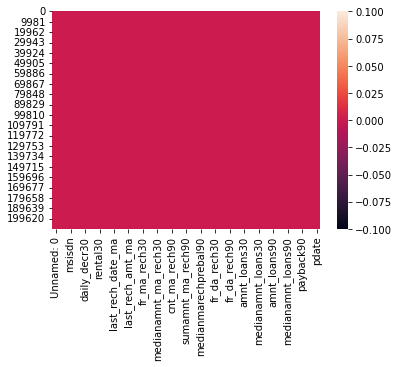

In [11]:
# Let us visualize the missing values:
sns.heatmap(df.isnull())

- We can visualize our data , we can see that there are no missing values in it.

##### From above all the observations we can see that column 'Unnamed: 0' is just a unique number given to all the data, so it do not have any relevant input to our dataset, We will drop that column.

In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

- We have successfully dropped the Unnamed column.

# Duplicate Values

In [13]:
df.duplicated().sum()

1

- We can see that there is 1 duplicate value in our dataset, so let ur remove the duplicate value.

In [14]:
df = df[~df.duplicated()]

In [15]:
# Now after removing the duplicate values lets check if there are any more duplicate values.
df.duplicated().sum()

0

- We have sucessfully removed the duplicate value from our dataset.

# Unique values

In [16]:
# Lets check number of unique values in the dataset:
df.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

#### We can see that label column has only 2 unique values, that means it has only 2 possible conditions and it is our target variable, so we can say that this is a classification problem.

- We can observe that column 'pcircle' has only 1 unique value so we will drop this column.

In [17]:
df.drop('pcircle',axis=1,inplace=True)

#### We can see that we have one column named 'pdate' which has date mentioned in it, so now we will first separate the day,month and year.

In [18]:
df['pdate'] = pd.to_datetime(df['pdate'])
df['pdate']

0        2016-07-20
1        2016-08-10
2        2016-08-19
3        2016-06-06
4        2016-06-22
            ...    
209588   2016-06-17
209589   2016-06-12
209590   2016-07-29
209591   2016-07-25
209592   2016-07-07
Name: pdate, Length: 209592, dtype: datetime64[ns]

In [19]:
df['pdate'].dt.day

0         20
1         10
2         19
3          6
4         22
          ..
209588    17
209589    12
209590    29
209591    25
209592     7
Name: pdate, Length: 209592, dtype: int64

In [20]:
df['day'] = df['pdate'].dt.day

In [21]:
df['pdate'].dt.month

0         7
1         8
2         8
3         6
4         6
         ..
209588    6
209589    6
209590    7
209591    7
209592    7
Name: pdate, Length: 209592, dtype: int64

In [22]:
df['month'] = df['pdate'].dt.month

In [23]:
df['pdate'].dt.year

0         2016
1         2016
2         2016
3         2016
4         2016
          ... 
209588    2016
209589    2016
209590    2016
209591    2016
209592    2016
Name: pdate, Length: 209592, dtype: int64

In [24]:
df['year'] = df['pdate'].dt.year

In [25]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,day,month,year
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,20,7,2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,10,8,2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,19,8,2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6,2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,22,6,2016


- Now we can see that day,month and year columns are separated and we can drop the pdate column.

In [26]:
df.drop('pdate',axis=1,inplace=True)

In [27]:
# Let us check the value counts of all data:

for columns in df:
    print(columns)
    print(df[columns].value_counts())
    print("="*120)

label
1    183430
0     26162
Name: label, dtype: int64
msisdn
04581I85330    7
47819I90840    7
43430I70786    6
55809I89238    6
67324I84453    6
              ..
28720I90840    1
36902I90840    1
17447I88689    1
59686I90584    1
65061I85339    1
Name: msisdn, Length: 186243, dtype: int64
aon
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
977092.351997      1
645851.038396      1
881623.815396      1
555267.797667      1
811881.372822      1
Name: aon, Length: 4507, dtype: int64
daily_decr30
0.000000        4144
500.000000       829
1000.000000      569
700.000000       381
600.000000       354
                ... 
75.915000          1
9.516667           1
21078.677000       1
7887.732000        1
4489.362000        1
Name: daily_decr30, Length: 147025, dtype: int64
daily_decr90
0.000       4063
500.000      781
1000.000     490
700.000      343
600.000      316
            ... 
1231.770       1
7385.270 

- We are able to now see the value counts of all the columns.

In [28]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'day', 'month', 'year'],
      dtype='object')

### Columns Description:

- Variable : Defination -> comment
    
label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
    
msisdn : mobile number of user
    
aon : age on cellular network in days
    
daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
    
daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
    
rental30 : Average main account balance over last 30 days -> Unsure of given definition
    
rental90 : Average main account balance over last 90 days -> Unsure of given definition
    
last_rech_date_ma : Number of days till last recharge of main account
    
last_rech_date_da : Number of days till last recharge of data account
    
last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)
    
cnt_ma_rech30 : Number of times main account got recharged in last 30 days
    
fr_ma_rech30 : Frequency of main account recharged in last 30 days -> Unsure of given definition
    
sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
    
medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
    
medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
    
cnt_ma_rech90 : Number of times main account got recharged in last 90 days
    
fr_ma_rech90 : Frequency of main account recharged in last 90 days -> Unsure of given definition
    
sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
    
medianamnt_ma_rech90 : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
    
medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
    
cnt_da_rech30 : Number of times data account got recharged in last 30 days
    
fr_da_rech30 : Frequency of data account recharged in last 30 days
    
cnt_da_rech90 : Number of times data account got recharged in last 90 days
    
fr_da_rech90 : Frequency of data account recharged in last 90 days
    
cnt_loans30 : Number of loans taken by user in last 30 days
    
amnt_loans30 : Total amount of loans taken by user in last 30 days
    
maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days -> There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively
        
medianamnt_loans30 : Median of amounts of loan taken by the user in last 30 days
    
cnt_loans90 : Number of loans taken by user in last 90 days
    
amnt_loans90 : Total amount of loans taken by user in last 90 days
    
maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days
    
medianamnt_loans90 : Median of amounts of loan taken by the user in last 90 days
    
payback30 : Average payback time in days over last 30 days
    
payback90 : Average payback time in days over last 90 days
    
day : date
    
month : month
    
year : year

# Let us separate the object datatype column and numerical datatype column.

In [29]:
object_datatype=[]

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        object_datatype.append(i)
object_datatype

['msisdn']

In [30]:
numerical_datatype=[]

for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_datatype.append(i)
numerical_datatype

['label',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90',
 'day',
 'month',
 'year']

- Now we can see that all the columns are numerical except column 'msisdn' which is object dtype, so we will be using encoding technique for that column.

#### Let us check again the unique values of the dataset, after removing irrelvant columns and converting pdate to day,month and year. 

In [31]:
df.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

- We can see that year column has only 1 unique value, so we will drop it.

In [32]:
df.drop('year',axis=1,inplace=True)

In [33]:
df.shape

(209592, 36)

- Now we have 35 feature columns and 1 target variable column.

# Encoding categorical column

In [34]:
le=LabelEncoder()
df['msisdn']=le.fit_transform(df['msisdn'].astype(str))

In [35]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


- We can now see that our object dtype column is also converted to the numerical dtype category.

In [36]:
numerical_cols=[]

for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_cols.append(i)
numerical_cols

['label',
 'msisdn',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90',
 'day',
 'month']

# Statistical Data:

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209592.0,0.875177,0.330519,0.000000,1.000000,1.000000,1.0000,1.000000
msisdn,209592.0,93100.358902,53758.424281,0.000000,46505.750000,93072.500000,139625.2500,186242.000000
aon,209592.0,8112.380399,75696.261220,-48.000000,246.000000,527.000000,982.0000,999860.755168
daily_decr30,209592.0,5381.412999,9220.644093,-93.012667,42.439500,1469.091833,7244.0960,265926.000000
daily_decr90,209592.0,6082.529123,10918.836919,-93.012667,42.691917,1500.000000,7802.7950,320630.000000
rental30,209592.0,2692.578912,4308.596841,-23737.140000,280.417500,1083.540000,3356.9450,198926.110000
rental90,209592.0,3483.407309,5770.475034,-24720.580000,300.260000,1334.000000,4201.7925,200148.110000
last_rech_date_ma,209592.0,3755.865715,53906.020204,-29.000000,1.000000,3.000000,7.0000,998650.377733
last_rech_date_da,209592.0,3712.220632,53374.960145,-29.000000,0.000000,0.000000,0.0000,999171.809410
last_rech_amt_ma,209592.0,2064.458973,2370.790003,0.000000,770.000000,1539.000000,2309.0000,55000.000000


- We have used transpose method here so that we do not need to scroll to the right side to check with the columns data.

- Statistical data gives us the information about count,mean,standard deviation,minimum,25%, 50%, 75%, maximum.

# Skewness

In [38]:
df.skew()

label                   -2.270245
msisdn                   0.000728
aon                     10.392923
daily_decr30             3.946219
daily_decr90             4.252553
rental30                 4.521921
rental90                 4.437670
last_rech_date_ma       14.790938
last_rech_date_da       14.814821
last_rech_amt_ma         3.781141
cnt_ma_rech30            3.283838
fr_ma_rech30            14.772797
sumamnt_ma_rech30        6.386774
medianamnt_ma_rech30     3.512314
medianmarechprebal30    14.779840
cnt_ma_rech90            3.425244
fr_ma_rech90             2.285415
sumamnt_ma_rech90        4.897937
medianamnt_ma_rech90     3.752696
medianmarechprebal90    44.880396
cnt_da_rech30           17.818321
fr_da_rech30            14.776395
cnt_da_rech90           27.267213
fr_da_rech90            28.988013
cnt_loans30              2.713426
amnt_loans30             2.975720
maxamnt_loans30         17.658009
medianamnt_loans30       4.551031
cnt_loans90             16.594368
amnt_loans90  

- We can see that there is high skewness present in many columns, We will need to treat it.

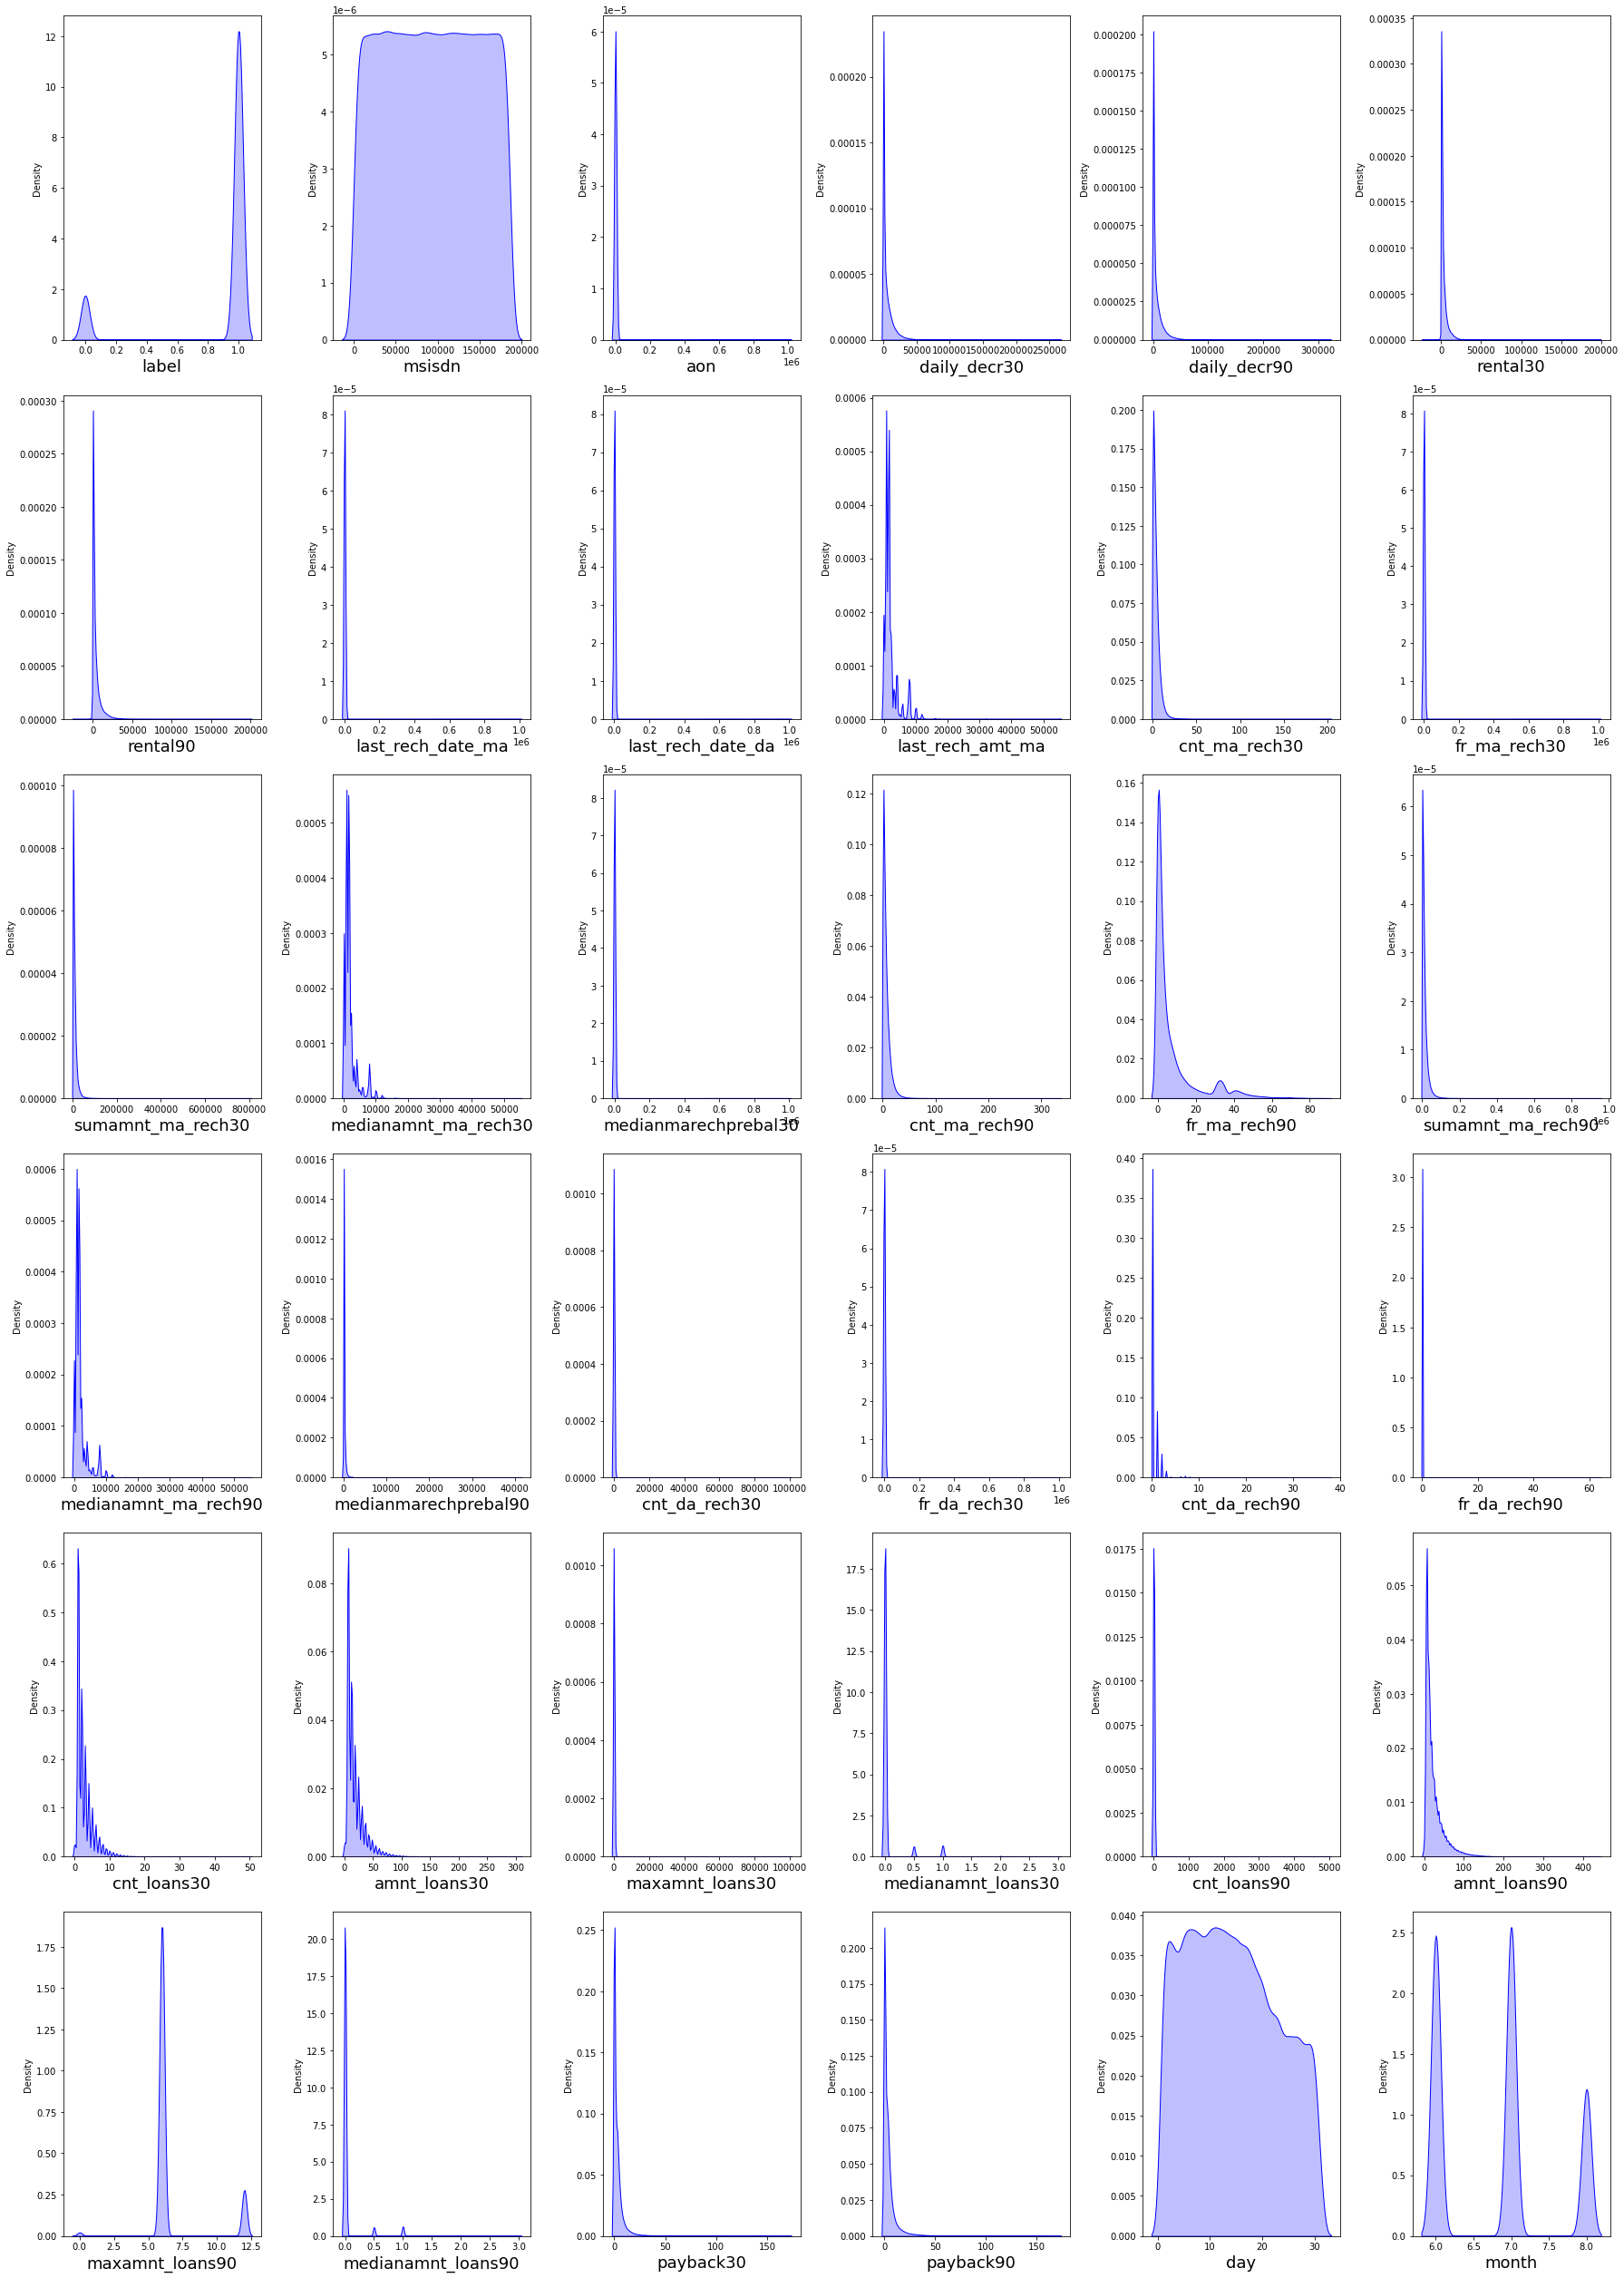

In [39]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_cols:
    if plotnumber<=36:
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(df[column],color="blue",hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.tight_layout()

# Checking Outliers

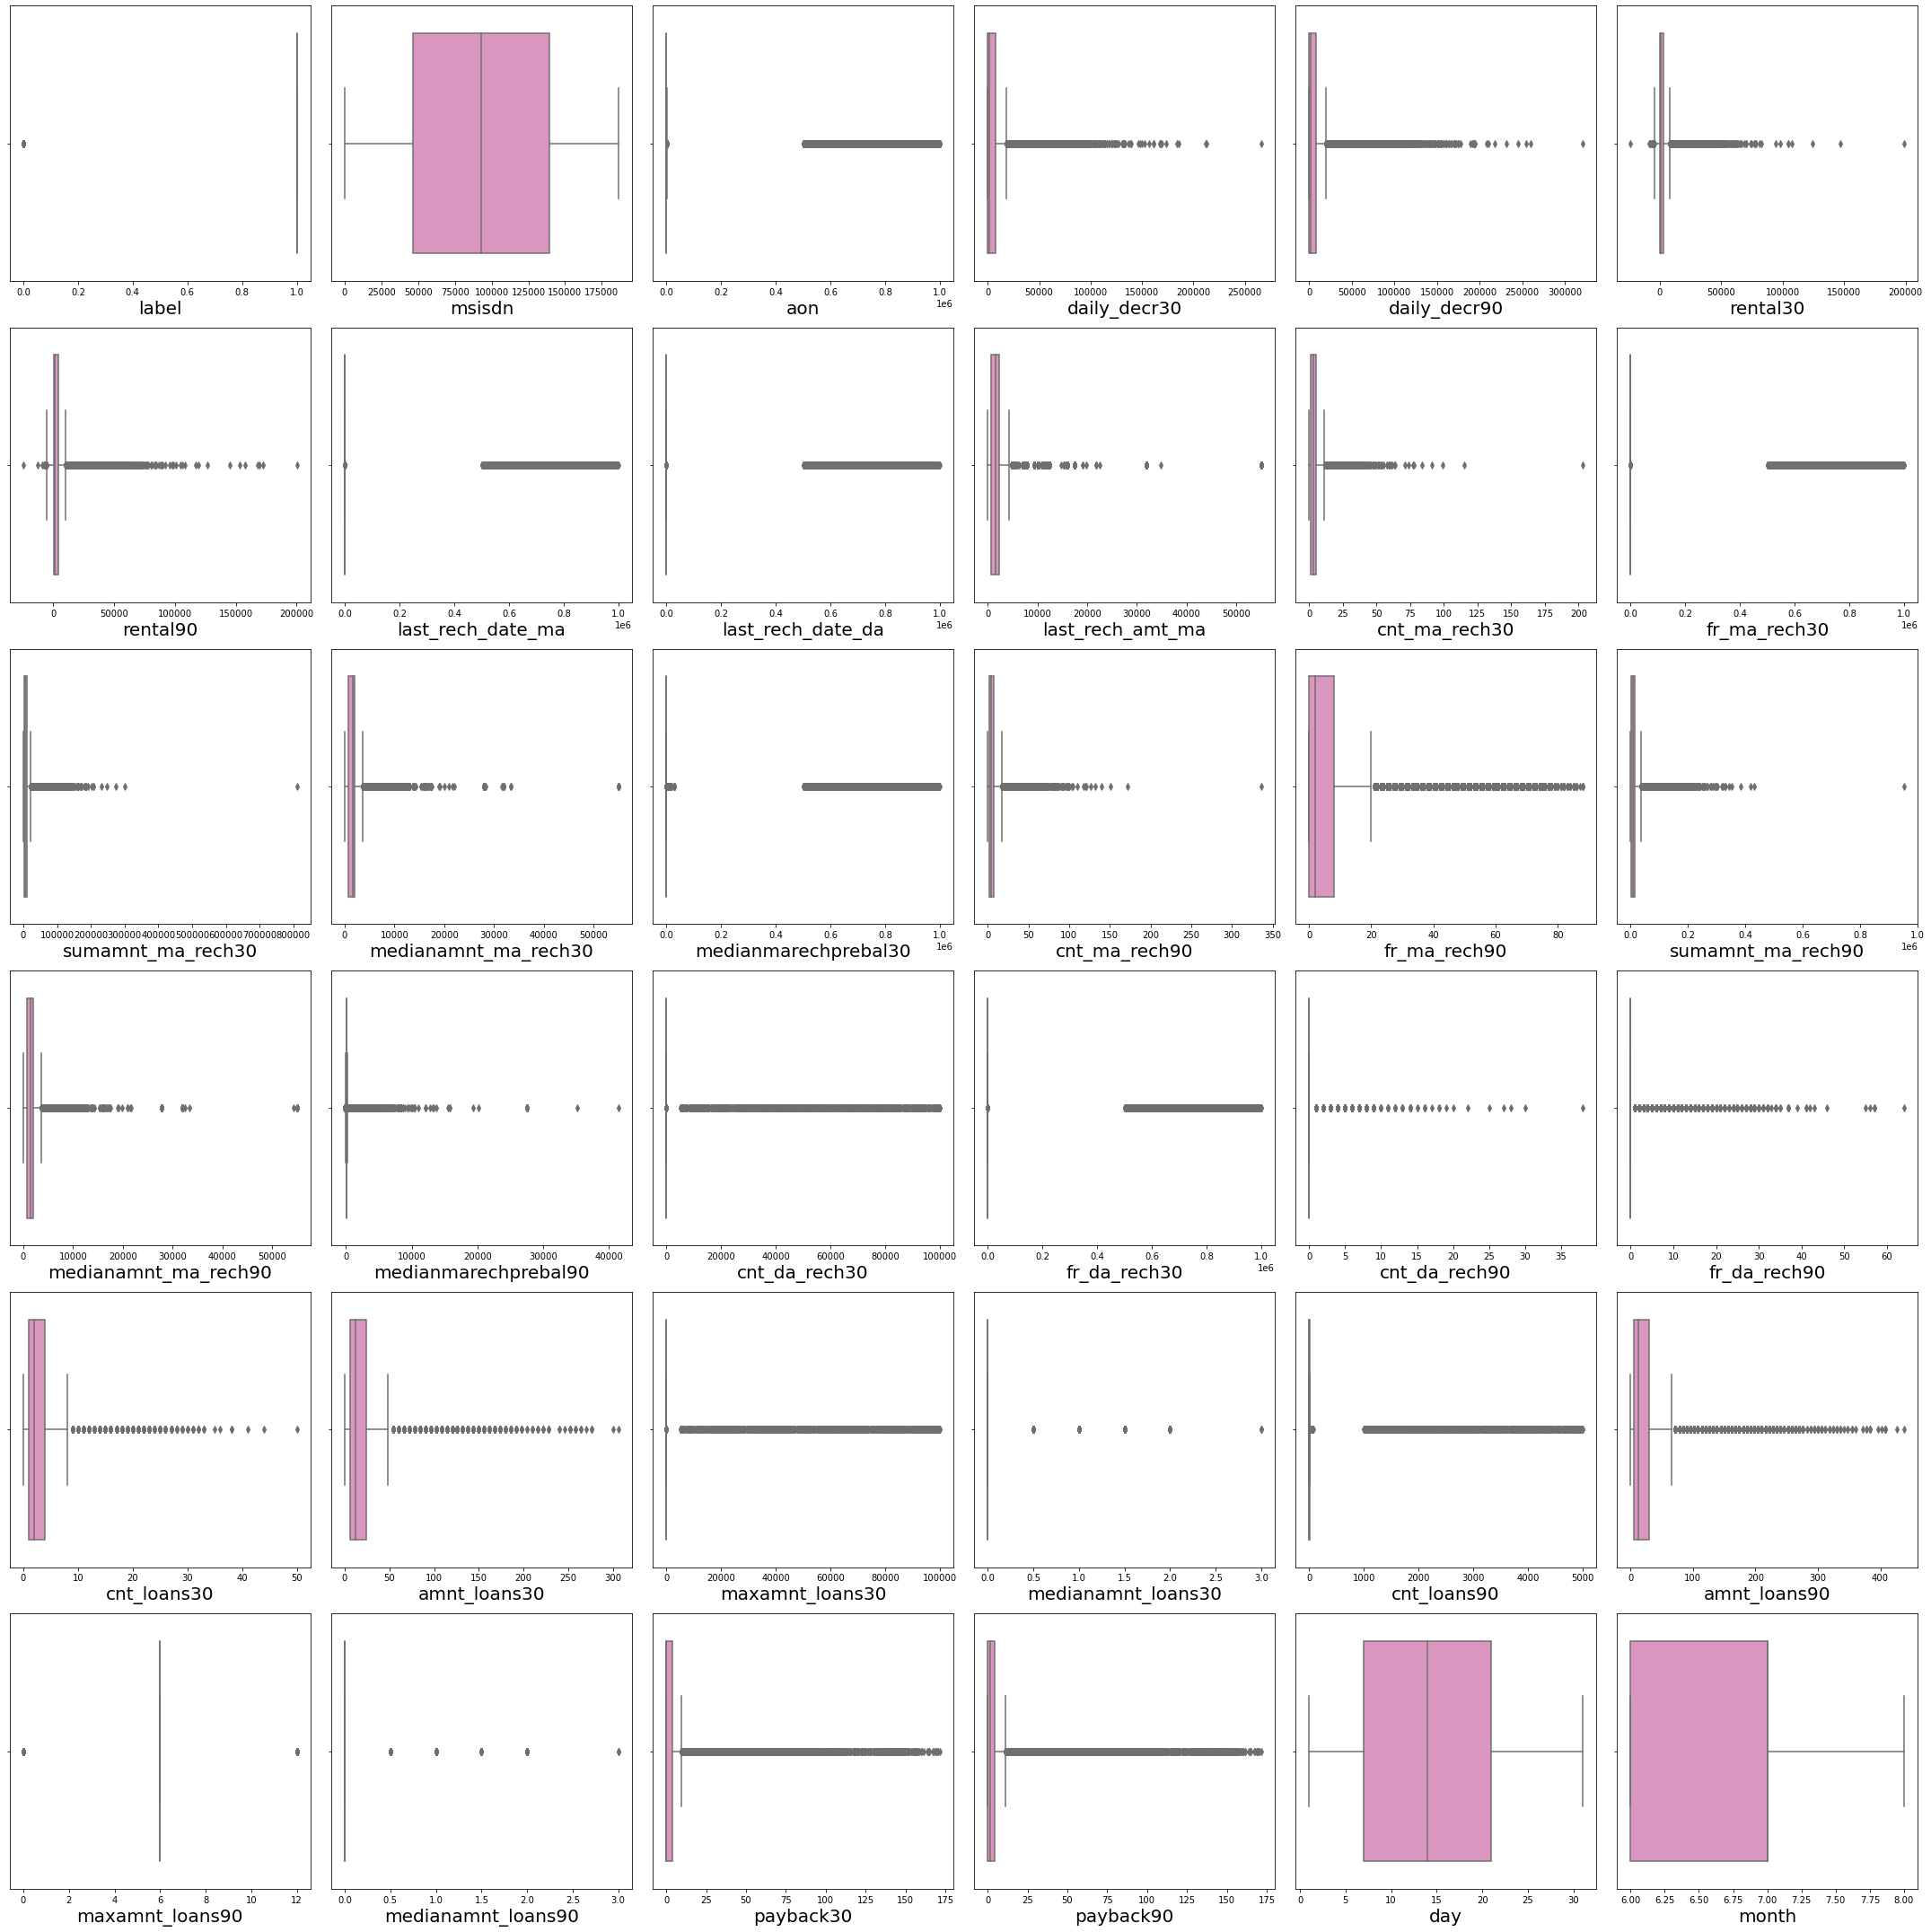

In [40]:
plt.figure(figsize=(30,30),facecolor='white')
plotnumber=1
for column in numerical_cols:
    if plotnumber<=36:
        ax=plt.subplot(6,6,plotnumber)
        sns.boxplot(df[column],palette="Set2_r")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Outliers are highly present in all the columns except for day, month, msisdn.

# Removing Outliers using z-score

In [41]:
features=df[['label',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z 

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,2.647889,0.103577,0.252300,0.276347,0.573842,0.558582,0.069637,0.069550,0.221639,0.464758,0.069279,0.456279,0.132225,0.071185,0.599910,1.055038,0.552755,0.156411,0.228933,0.06276,0.069583,0.104375,0.048048,0.297113,0.342467,0.063285,0.247795,0.073493,0.439949,0.334212,0.229594,2.904852,2.394185
1,0.377659,0.097764,0.731034,0.553377,0.231789,0.036020,0.069303,0.069550,1.570173,0.699716,0.069670,0.189109,1.919093,0.070194,0.738925,0.612920,0.392058,1.884248,0.083923,0.06276,0.069583,0.104375,0.048048,0.688579,0.342467,0.061871,0.247795,0.077941,0.439949,2.517683,0.229594,0.385626,0.419228
2,0.377659,0.100103,0.432011,0.429033,0.416018,0.447673,0.069619,0.069550,0.221639,0.699716,0.069670,0.608060,0.132225,0.070096,0.738925,0.612920,0.644049,0.156411,0.069622,0.06276,0.069583,0.104375,0.048048,0.688579,0.687697,0.063285,0.247795,0.077941,0.666622,0.334212,0.229594,0.385626,0.419228
3,0.377659,0.103987,0.581326,0.555125,0.587933,0.576035,0.068914,0.069550,0.471346,0.934673,0.069670,0.759841,0.875392,0.071324,0.738925,0.612920,0.679166,0.440796,0.242475,0.06276,0.069583,0.104375,0.048048,0.297113,0.342467,0.063285,0.247795,0.073493,0.439949,0.334212,0.229594,0.385626,0.419228
4,0.377659,0.094660,0.567293,0.543274,0.369884,0.413226,0.069600,0.069550,0.103148,0.710029,0.069633,1.215480,0.239601,0.070787,0.234180,0.454067,0.658435,0.491623,0.154450,0.06276,0.069583,0.104375,0.048048,1.660217,1.383681,0.063285,0.247795,0.051251,0.693415,0.334212,0.229594,0.120875,0.192861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.377659,0.101833,0.567157,0.543160,0.372138,0.414909,0.069656,0.069550,0.836660,0.229801,0.069633,0.266233,0.659232,0.069624,0.460895,0.454067,0.118179,0.630934,0.000584,0.06276,0.069583,0.104375,0.048048,0.297113,0.342467,0.063285,0.247795,0.073493,0.439949,0.334212,0.229594,0.272161,0.322214
209589,0.377659,0.092969,0.579622,0.553686,0.223790,0.304143,0.069600,0.069550,0.544739,0.005157,0.069652,0.454898,0.502118,0.068337,0.043850,0.454067,0.495808,0.524383,0.053558,0.06276,0.069583,0.104375,0.048048,0.094353,0.002762,0.063285,0.247795,0.069044,0.213276,0.334212,0.229594,0.272161,0.322214
209590,0.377659,0.093788,0.700788,0.533192,0.735566,0.937497,0.069619,0.069550,0.221639,0.240114,0.069521,0.160707,0.132225,0.070377,0.651224,0.215787,0.367531,0.156411,0.121597,0.06276,0.069583,0.104375,0.048048,0.485819,1.383681,0.061871,0.247795,0.055699,1.146761,2.517683,0.229594,0.068233,0.047340
209591,0.377659,0.084289,0.770752,0.594556,0.529350,0.433038,0.069637,0.068838,0.544739,0.240114,0.069596,0.438823,0.502118,0.068287,0.043850,0.295214,0.328914,0.262241,0.021598,0.06276,0.069583,2.410996,0.048048,0.297113,0.002762,0.061871,0.247795,0.069044,0.013396,2.517683,0.229594,0.385626,0.599422


In [42]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,42866,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
209589,1,178248,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
209590,1,53995,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
209591,1,111388,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


In [43]:
# Lets check the shape of previous dataset.
df.shape

(209592, 36)

In [44]:
#Lets check the shape of new dataset.
df_new.shape

(161465, 36)

In [45]:
# Lets check the percentage data loss:
dataloss=((209592-161465)/209592)*100

In [46]:
dataloss

22.96223138287721

- As per instructions we know that tha data is expensive and we can afford only losing 7-8% of data, so we will keep outliers as is.

# Correlation

In [47]:
df.corr()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
label,1.000000,0.001974,-0.003785,0.168298,0.166151,0.058084,0.075521,0.003728,0.001711,0.131805,0.237331,0.001330,0.202828,0.141491,-0.004829,0.236393,0.084386,0.205794,0.120855,0.039300,0.003827,-0.000026,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044590,0.004733,0.199788,0.084144,0.035747,0.048330,0.049178,0.006824,0.154948
msisdn,0.001974,1.000000,0.000566,0.000718,0.000951,-0.001405,-0.000691,-0.000928,0.001400,-0.002365,0.000616,-0.001804,0.001093,0.000668,-0.000238,-0.001858,-0.004410,-0.000935,-0.000624,-0.000615,-0.001720,-0.000241,0.004596,-0.002232,0.001763,0.002168,-0.000755,0.000987,0.001860,-0.000155,0.003287,0.001212,0.002898,0.002651,0.002460,-0.002987
aon,-0.003785,0.000566,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001942,0.002205,0.000663,-0.001863
daily_decr30,0.168298,0.000718,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078300,0.762981,0.257846,0.037495,0.000700,-0.001500,0.038814,0.020673,0.366117,0.471492,-0.000028,-0.011611,0.008962,0.563496,0.400199,-0.037305,0.026922,0.047181,0.006478,0.518664
daily_decr90,0.166151,0.000951,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264130,0.426708,-0.000343,0.603886,0.282959,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000660,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005592,0.009446,0.567204,0.397251,-0.034686,0.019406,0.040806,-0.021507,0.539411
rental30,0.058084,-0.001405,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003262,0.127272,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033529,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234212,-0.035489,0.072974,0.095148,0.036537,0.365699
rental90,0.075521,-0.000691,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067114,0.099505,0.008941,0.429408
last_rech_date_ma,0.003728,-0.000928,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002231,-0.001582,0.000561,-0.001207
last_rech_date_da,0.001711,0.001400,-0.001693,-0.001636,-0.001886,0.003262,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000079,0.000418,0.000631,-0.001800
last_rech_amt_ma,0.131805,-0.002365,0.004256,0.275837,0.264130,0.127272,0.121416,-0.000147,-0.000149,1.000000,-0.002661,0.002876,0.440821,0.794646,-0.002342,0.016706,0.106265,0.418735,0.818735,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027611,0.008503,0.001000,0.028370,0.000093,0.014067,0.148459,0.021004,-0.027358,-0.014251,0.028886,0.096920


# Correlation using Heatmap

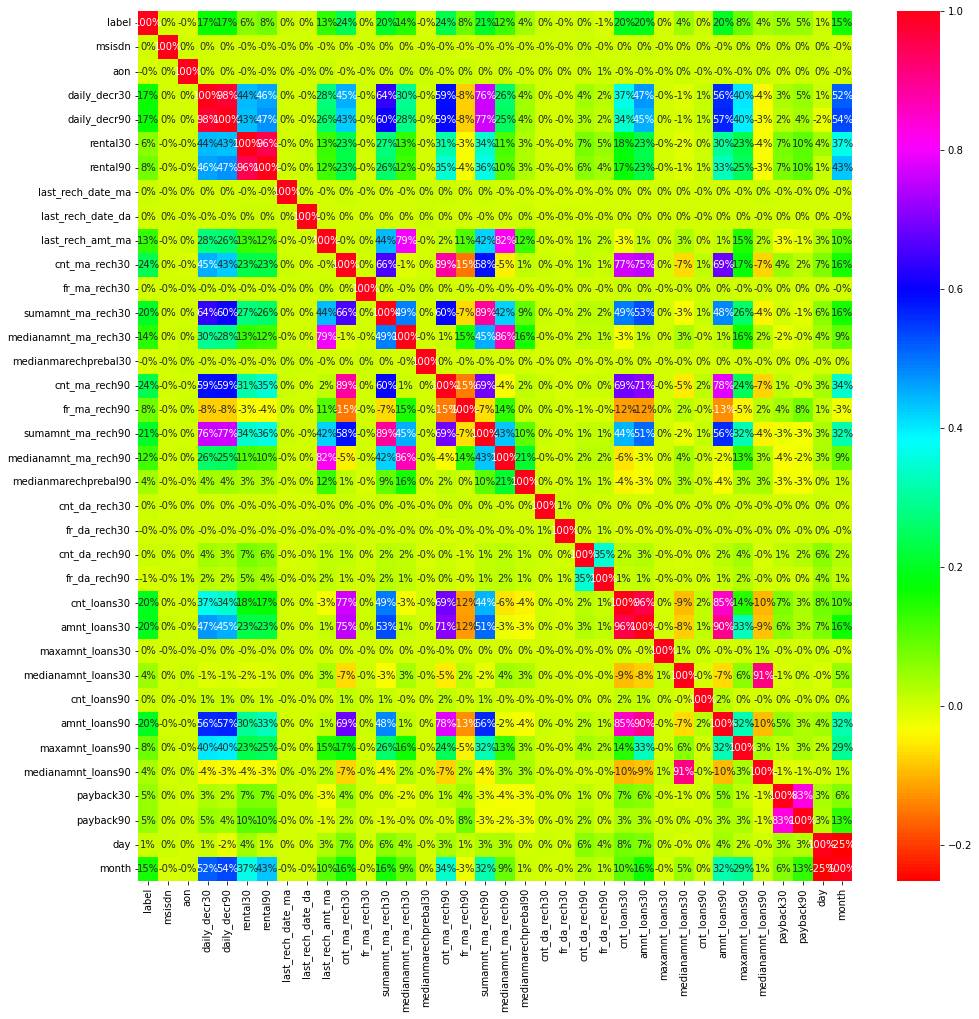

In [48]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True,fmt='.0%',cmap='hsv')
plt.show()

### Observation:

1. The columns amnt_loans90, amnt_loans30, cnt_loans20, sumamnt_ma_rech90, cnt_ma_rech90, cnt_ma_rech30, sumamnt_ma_rech30 are highly positively correlated with label column.

2. We have observed multicollinearity in between columns so we will be using PCA(Principal Component Analysis)

3. No correlation has been observed in msisdn, last_rechdate_ma, last_rech_date_da, medianmarechprebal30 column so will be dropping these columns.

# Correlation using barplot

Text(0.5, 1.0, 'correaltion with target variable label')

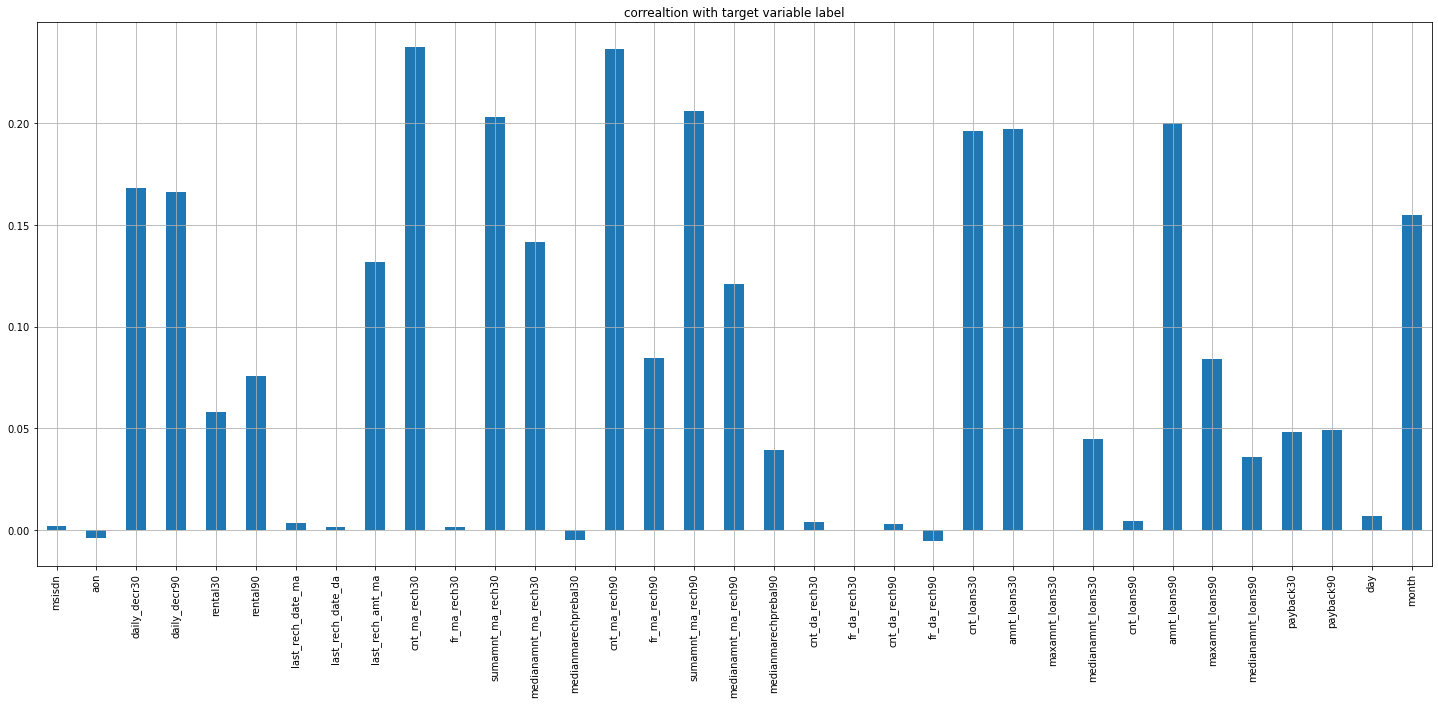

In [49]:
#checking the correlation with target variable 'label'

plt.figure(figsize=(25,10))
df.drop('label', axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("correaltion with target variable label")

- We will be dropping all the columns which are less correlated with our target variable.

In [50]:
df.drop(['msisdn','last_rech_date_ma','last_rech_date_da','fr_ma_rech30','fr_da_rech30','maxamnt_loans30'],axis=1,inplace=True)

In [51]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,1539,2,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0,0,2,12,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,5787,1,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0,0,1,12,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,1539,1,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0,0,1,6,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,947,0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0,0,2,12,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,2309,7,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0,0,7,42,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


# Data Visualization

Our target variable is label

1 - Success(Non Defaulter)

0 - Failure(Defaulter)

### Univariate Analysis

### Countplot

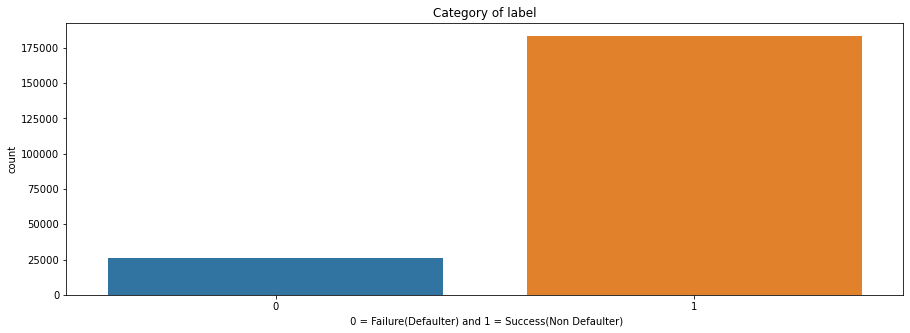

1    183430
0     26162
Name: label, dtype: int64

In [52]:
#Checking the target variable

plt.subplots(figsize=(15,5))
sns.countplot(x="label", data=df)
plt.title("Category of label")
plt.xlabel(' 0 = Failure(Defaulter) and 1 = Success(Non Defaulter)')
plt.ylabel("count")
plt.show()

df['label'].value_counts()

Observation:

1. We can observe that there are 183431 number of Non defaulters where as 26162 number of defaulters.

2. We can observe that this is a very imbalanced data set.

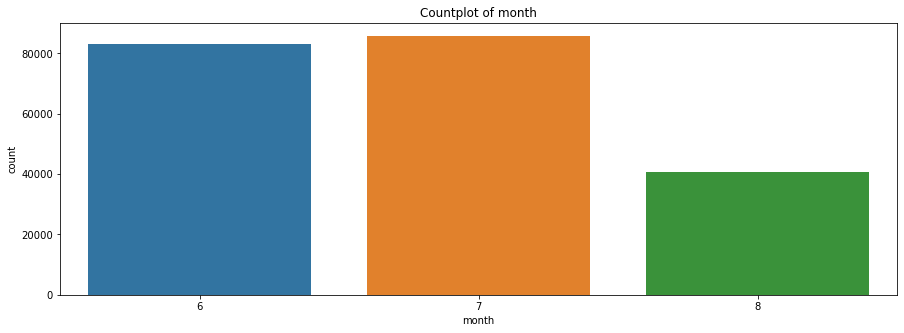

7    85764
6    83154
8    40674
Name: month, dtype: int64

In [53]:
#Checking the month column

plt.subplots(figsize=(15,5))
sns.countplot(x="month", data=df)
plt.title("Countplot of month")
plt.xlabel('month')
plt.ylabel("count")
plt.show()

df['month'].value_counts()

- Maximum(85764) number of users have taken credit in the 7th month.

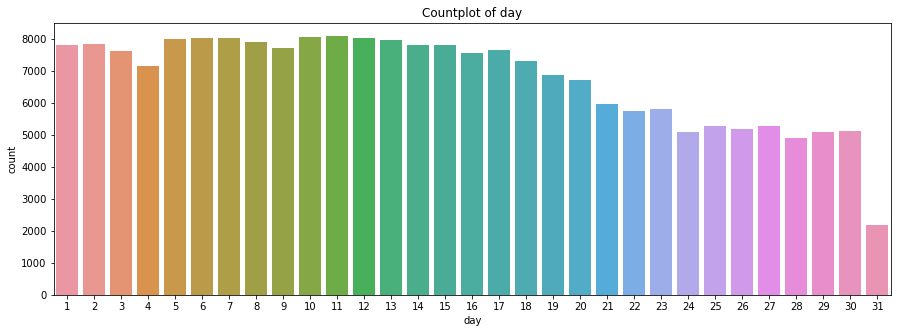

11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5815
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: day, dtype: int64

In [54]:
#Checking the day column

plt.subplots(figsize=(15,5))
sns.countplot(x="day", data=df)
plt.title("Countplot of day")
plt.xlabel('day')
plt.ylabel("count")
plt.show()

df['day'].value_counts()

- Maximum(8092) number of users have taken credit on 11th day of the month. 

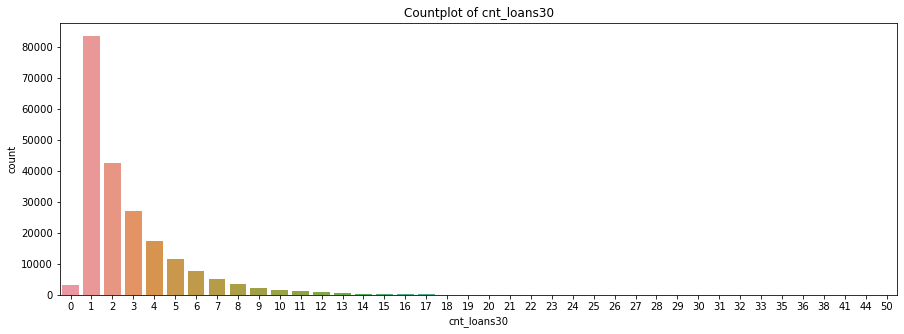

1     83432
2     42665
3     27050
4     17498
5     11673
6      7773
7      5041
8      3384
0      3259
9      2273
10     1571
11     1143
12      793
13      547
14      383
15      270
16      213
17      164
18       98
19       77
20       54
21       45
22       42
23       38
25       19
26       17
27       15
24       13
29        9
31        8
28        7
30        4
32        4
33        3
38        2
36        1
41        1
44        1
50        1
35        1
Name: cnt_loans30, dtype: int64

In [55]:
#Checking the cnt_loans30 column

plt.subplots(figsize=(15,5))
sns.countplot(x="cnt_loans30", data=df)
plt.title("Countplot of cnt_loans30")
plt.xlabel('cnt_loans30')
plt.ylabel("count")
plt.show()

df['cnt_loans30'].value_counts()

- Above countplot shows the count of number of loans taken by user in last 30 days 

### Violinplot

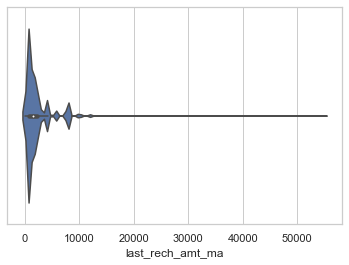

1539     56297
770      41765
0        20995
773      19523
2309     16113
         ...  
4066         1
15652        1
772          1
34783        1
10454        1
Name: last_rech_amt_ma, Length: 70, dtype: int64

In [56]:
#Voilinplot of column last_rech_amt_ma


sns.set(style='whitegrid')
sns.violinplot(df['last_rech_amt_ma'])
plt.show()

df['last_rech_amt_ma'].value_counts()

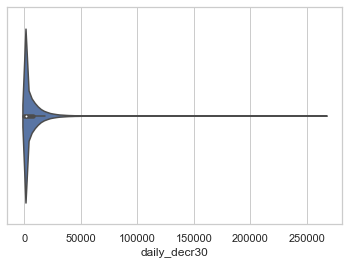

0.000000        4144
500.000000       829
1000.000000      569
700.000000       381
600.000000       354
                ... 
75.915000          1
9.516667           1
21078.677000       1
7887.732000        1
4489.362000        1
Name: daily_decr30, Length: 147025, dtype: int64

In [57]:
#Voilinplot of column daily_decr30


sns.set(style='whitegrid')
sns.violinplot(df['daily_decr30'])
plt.show()

df['daily_decr30'].value_counts()

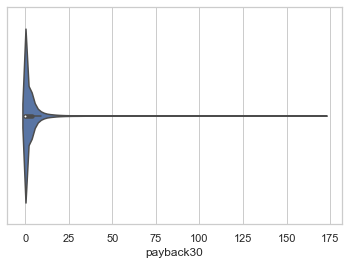

0.000000     106712
2.000000       5601
3.000000       5023
4.000000       3931
2.500000       3518
              ...  
48.400000         1
3.133333          1
1.518519          1
1.212121          1
5.615385          1
Name: payback30, Length: 1363, dtype: int64

In [58]:
#Voilinplot of column payback30


sns.set(style='whitegrid')
sns.violinplot(df['payback30'])
plt.show()

df['payback30'].value_counts()

### Scatterplot

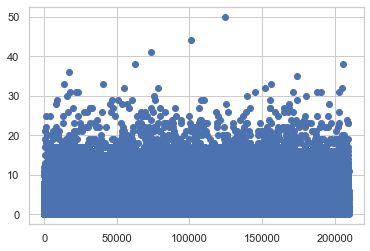

1     83432
2     42665
3     27050
4     17498
5     11673
6      7773
7      5041
8      3384
0      3259
9      2273
10     1571
11     1143
12      793
13      547
14      383
15      270
16      213
17      164
18       98
19       77
20       54
21       45
22       42
23       38
25       19
26       17
27       15
24       13
29        9
31        8
28        7
30        4
32        4
33        3
38        2
36        1
41        1
44        1
50        1
35        1
Name: cnt_loans30, dtype: int64

In [59]:
# Scatter plot of cnt_loans30 column

plt.scatter(df.index,df['cnt_loans30'])
plt.show()

df['cnt_loans30'].value_counts()

- Maximum(83432) number of customers cnt_loans30 is 1.

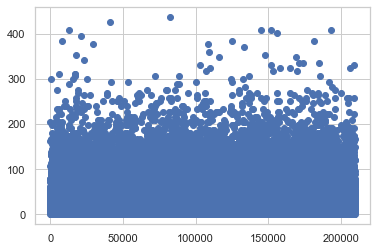

6      69131
12     38908
18     23867
24     17215
30     12503
       ...  
438        1
360        1
372        1
402        1
426        1
Name: amnt_loans90, Length: 69, dtype: int64

In [60]:
# Scatter plot of amnt_loans90 column

plt.scatter(df.index,df['amnt_loans90'])
plt.show()

df['amnt_loans90'].value_counts()

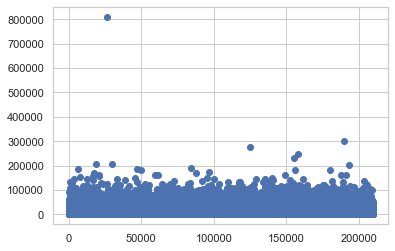

0.0        27979
1539.0      9006
770.0       6040
773.0       4540
2309.0      4509
           ...  
40924.0        1
38412.0        1
22899.0        1
5381.0         1
12154.0        1
Name: sumamnt_ma_rech30, Length: 15141, dtype: int64

In [61]:
# Scatter plot of sumamnt_ma_rech30 column

plt.scatter(df.index,df['sumamnt_ma_rech30'])
plt.show()

df['sumamnt_ma_rech30'].value_counts()

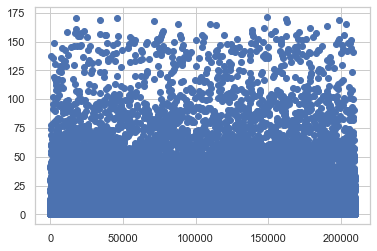

0.000000     95699
2.000000      4982
3.000000      4437
4.000000      3610
2.500000      3015
             ...  
35.625000        1
48.400000        1
8.363636         1
62.666667        1
25.846154        1
Name: payback90, Length: 2381, dtype: int64

In [62]:
# SCatter plot of payback90 column

plt.scatter(df.index,df['payback90'])
plt.show()

df['payback90'].value_counts()

### Histogram

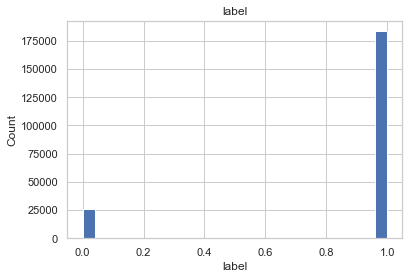

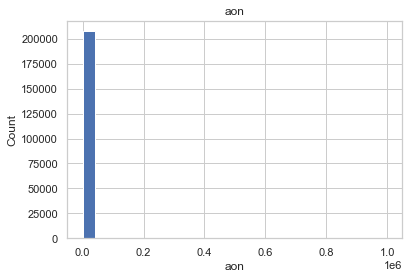

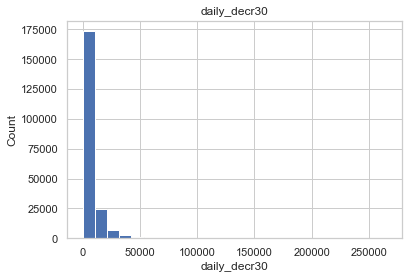

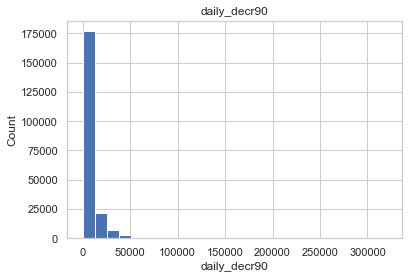

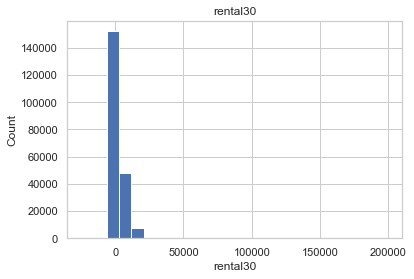

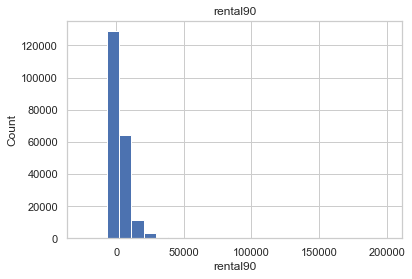

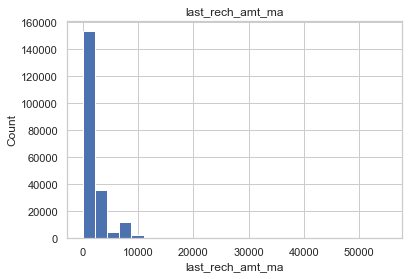

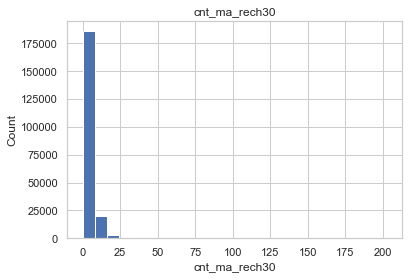

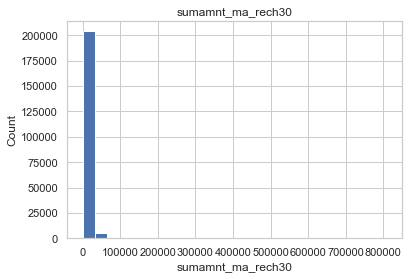

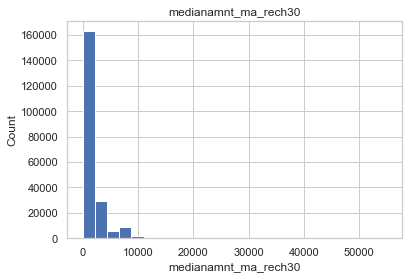

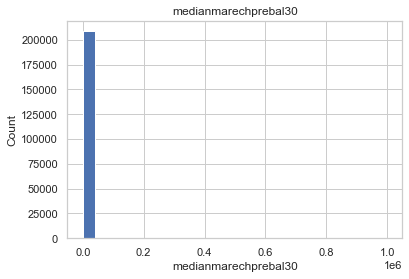

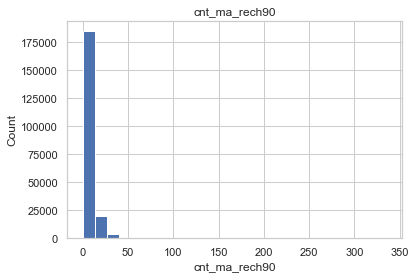

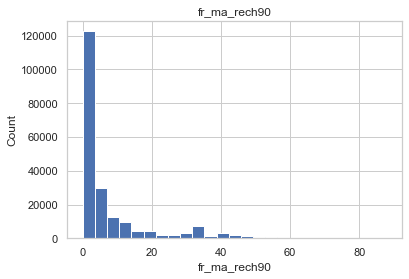

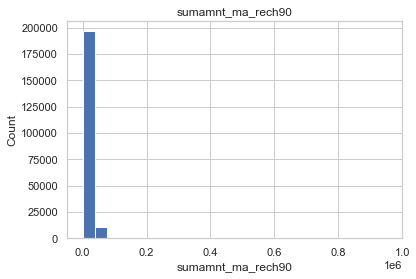

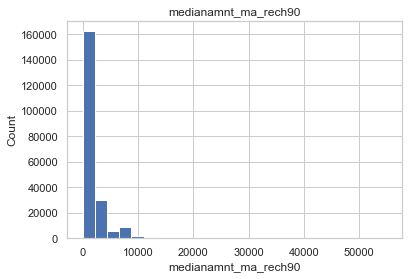

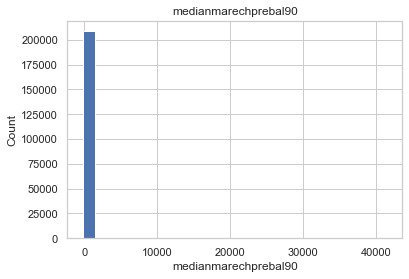

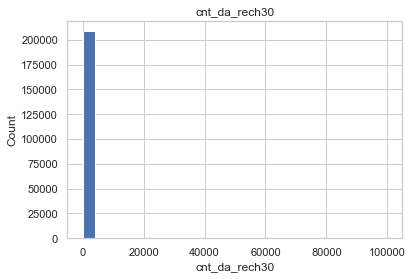

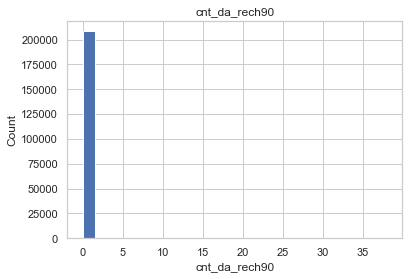

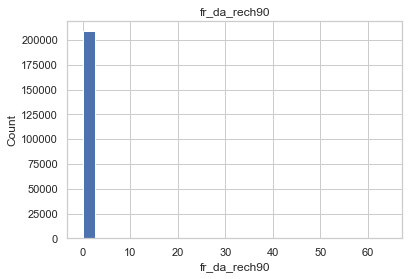

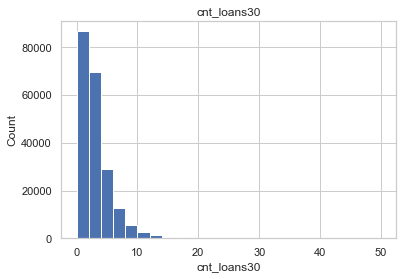

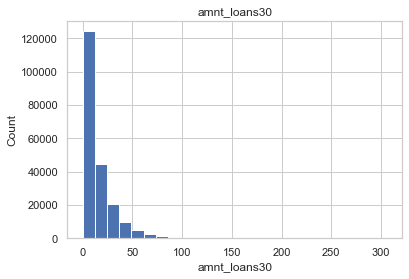

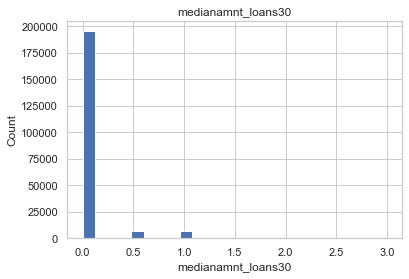

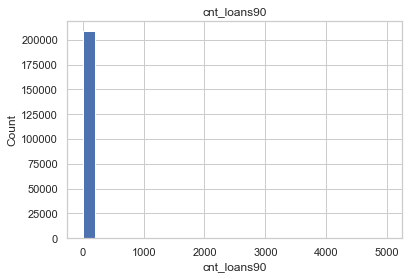

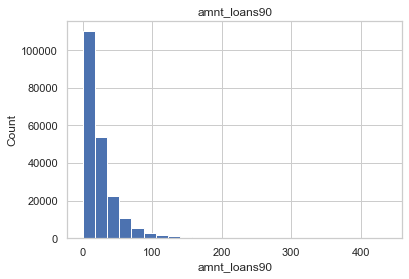

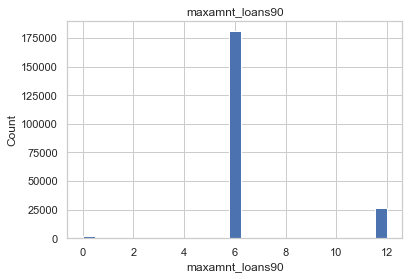

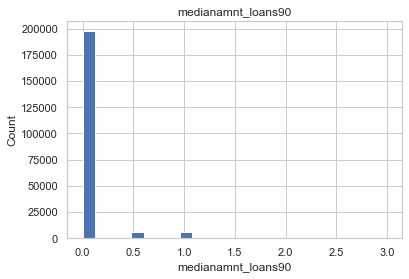

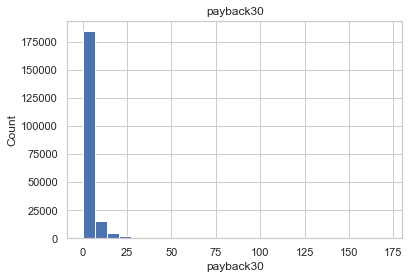

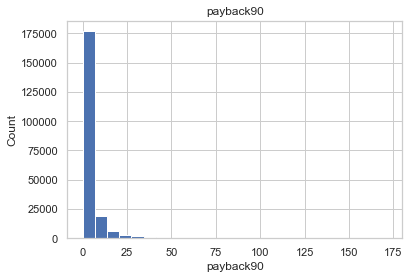

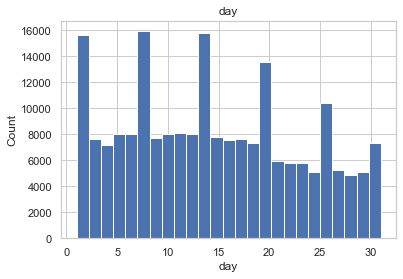

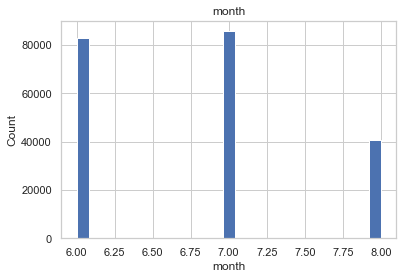

In [63]:
#Creating histogram of every column

for col in df.describe().columns:
    data=df.copy()
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

# Bivariate Analysis

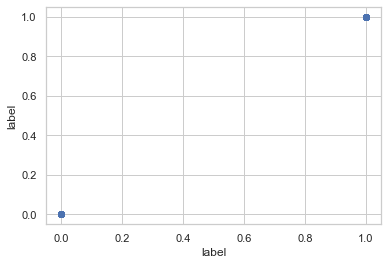

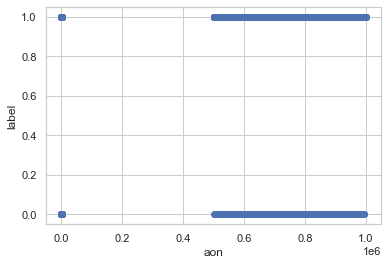

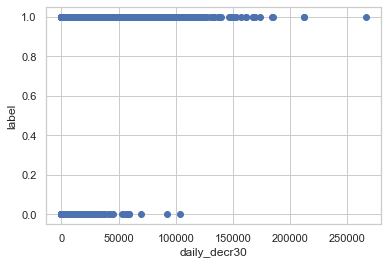

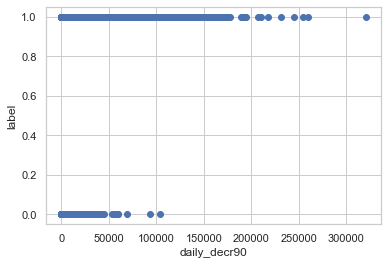

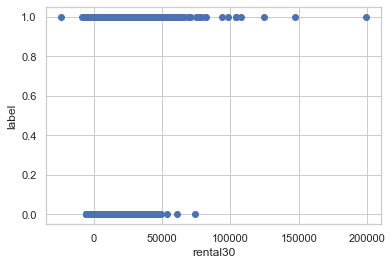

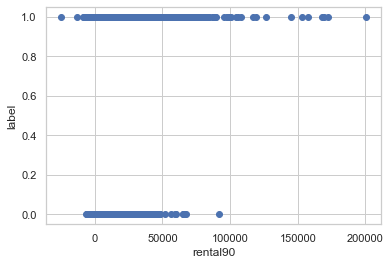

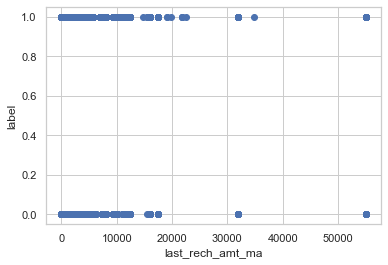

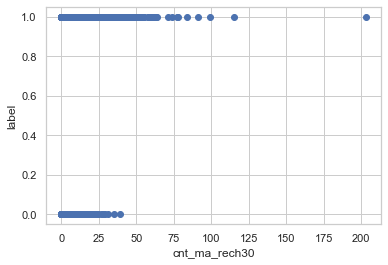

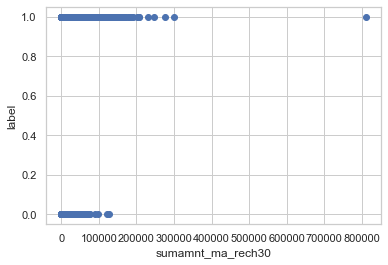

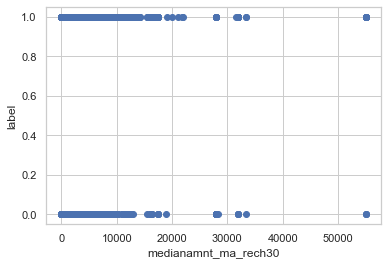

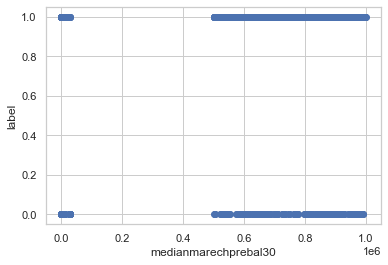

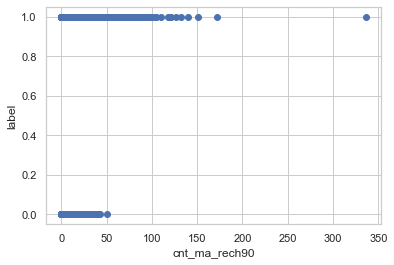

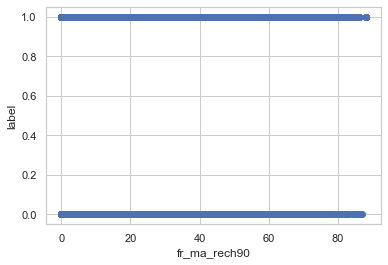

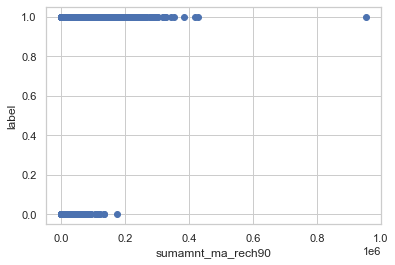

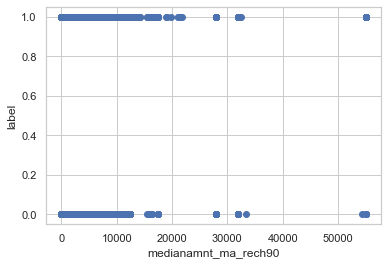

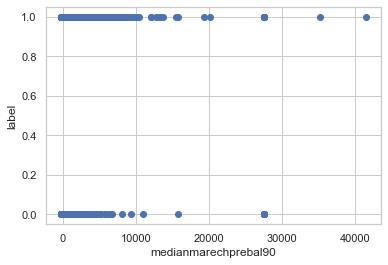

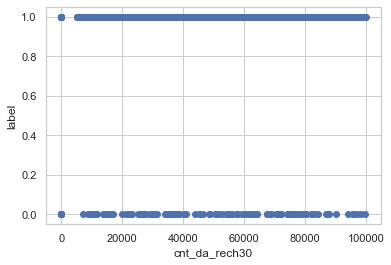

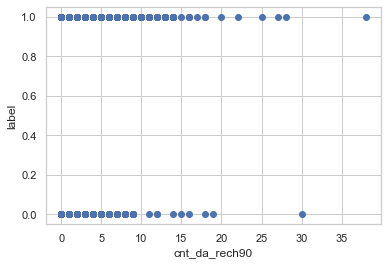

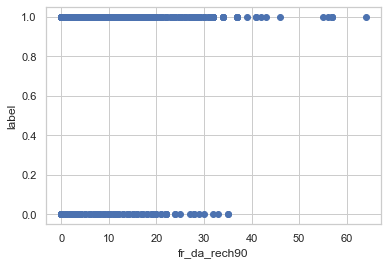

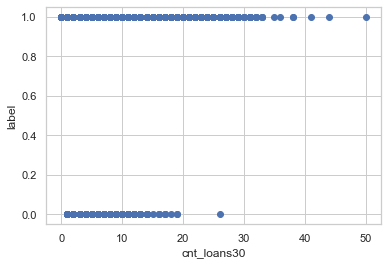

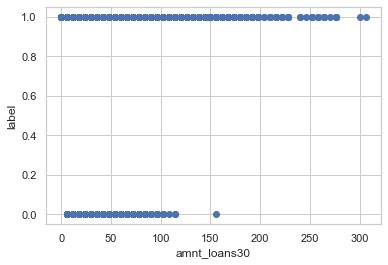

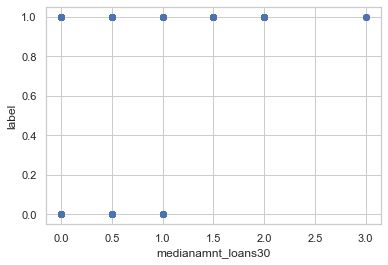

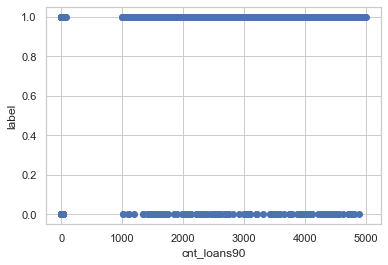

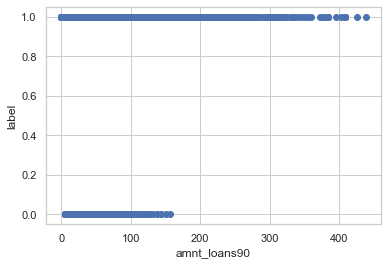

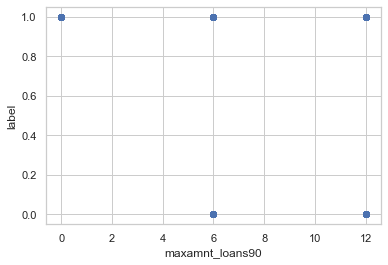

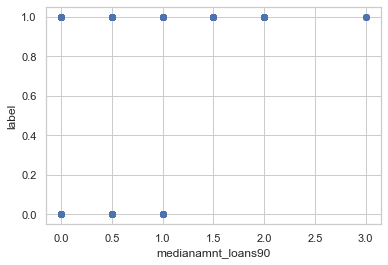

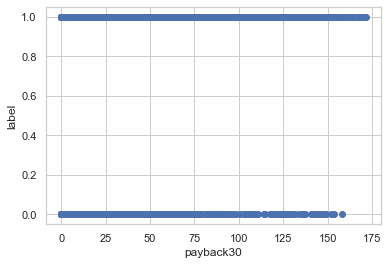

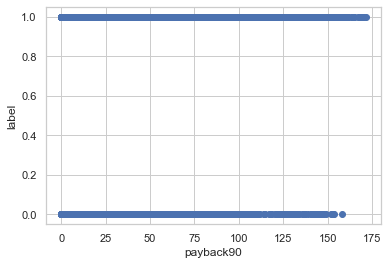

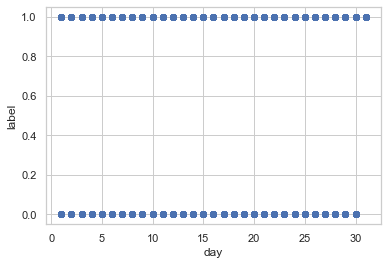

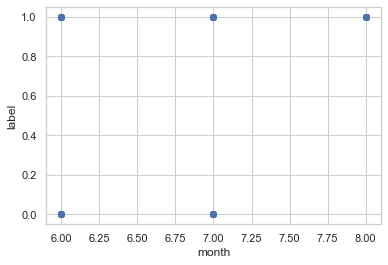

In [64]:
#Scatter plot between all feature variables and target variable

for col in df.describe().columns:
    data=df.copy()
    plt.scatter(data[col],data['label'])
    plt.xlabel(col)
    plt.ylabel('label')
    plt.show()

### Boxplot

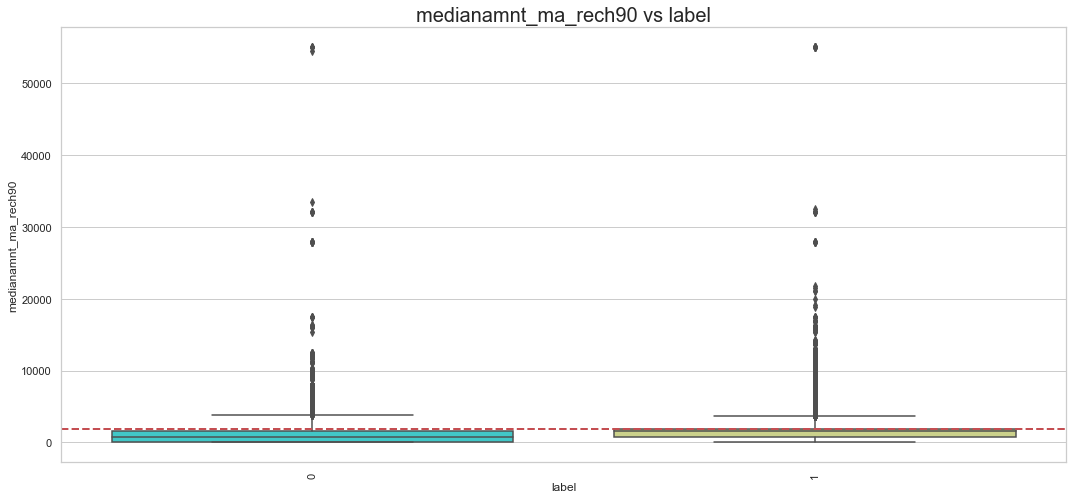

In [65]:
#label vs medianamnt_ma_rech90

plt.figure(figsize=(18,8))
mean_price=np.mean(df['medianamnt_ma_rech90'])
sns.boxplot(y='medianamnt_ma_rech90',x='label',data=df,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("medianamnt_ma_rech90 vs label",fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

# Model Training

In [66]:
df_x=df.drop(columns=['label'],axis=1)
y=df['label']

In [67]:
#Scaling input variables

sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

# Using PCA for multicollinearity issue

In [68]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = len(x.columns))
covar_matrix.fit(x)

PCA(n_components=29)

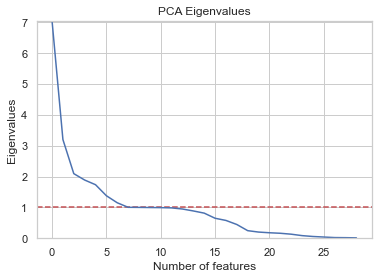

In [69]:
plt.ylabel('Eigenvalues')
plt.xlabel('Number of features')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

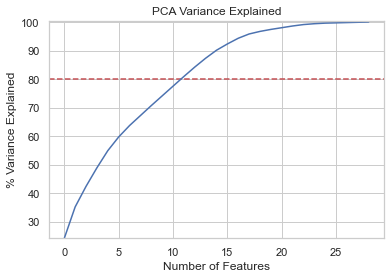

In [70]:
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var),100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

In [71]:
pca=PCA(n_components=7)
xpca=pca.fit_transform(x)
x=xpca

In [72]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6
0,-1.334141,-0.150935,1.814120,-1.715083,3.003061,-0.317551,-0.295477
1,0.749684,3.278559,0.440869,-0.373193,-1.084324,-0.533556,-1.205488
2,-1.657335,0.210084,0.287496,-0.168979,-0.951276,-0.234849,-0.424791
3,-2.294660,-0.766216,-0.502226,-0.043092,-0.616626,-0.266648,-0.490846
4,1.294383,-0.826977,-2.232685,-0.049435,1.236080,0.466460,0.923593
...,...,...,...,...,...,...,...
209587,-0.953629,1.074927,-1.350108,-0.335738,0.271391,0.188239,0.479669
209588,-1.215982,-1.092440,-0.691470,-0.043941,-0.219074,0.052213,0.243312
209589,2.483185,-0.796146,0.515277,-0.069151,-0.276431,0.492169,1.014614
209590,0.905310,-0.052463,0.245355,-0.110222,-0.061314,1.616580,-1.055195


# Splitting the data into training and testing data

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=9,stratify=y)

# Handling imbalanced data using Smote technique

In [74]:
from imblearn.combine import SMOTETomek

In [75]:
from collections import Counter

os=SMOTETomek(0.75)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({1: 128401, 0: 18313})
The number of classes after fit Counter({1: 125542, 0: 93441})


# Building Machine Learning Model

In [76]:
KNN=KNeighborsClassifier(n_neighbors=6)
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
GNB=GaussianNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

In [77]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('GaussianNB', GNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

* KNeighborsClassifier *


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.7846941696618849


Cross_Val_Score =  0.8862456676593962


roc_auc_score =  0.7625164415734549


classification_report
               precision    recall  f1-score   support

           0       0.33      0.73      0.46      7849
           1       0.95      0.79      0.87     55029

    accuracy                           0.78     62878
   macro avg       0.64      0.76      0.66     62878
weighted avg       0.88      0.78      0.81     62878



[[ 5753  2096]
 [11442 43587]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



* LogisticRegression *


LogisticRegression()


Accuracy_score =  0.7351696936925475


Cross_Val_Score =  0.8745181108773254


roc_auc_score =  0.7479309517340607


classification_report
               precision    recall  f1-score   support

           0       0.29      0.76      0.42      7849
           1       0.96      0.73      0.83     55029

    accuracy                       

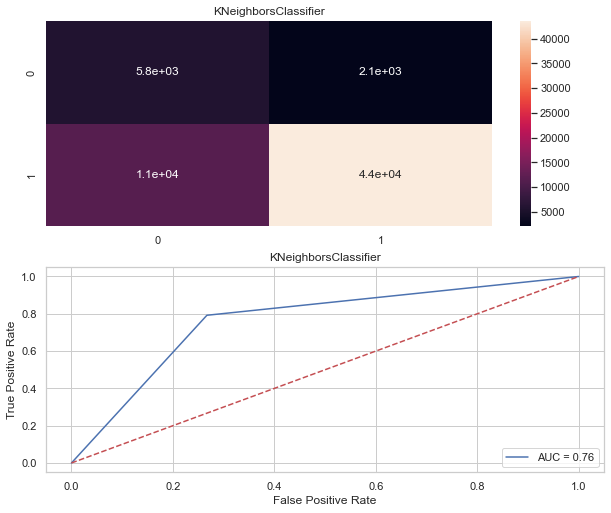

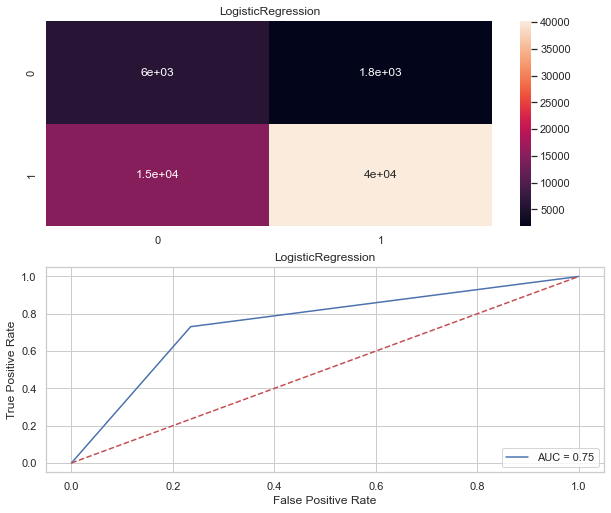

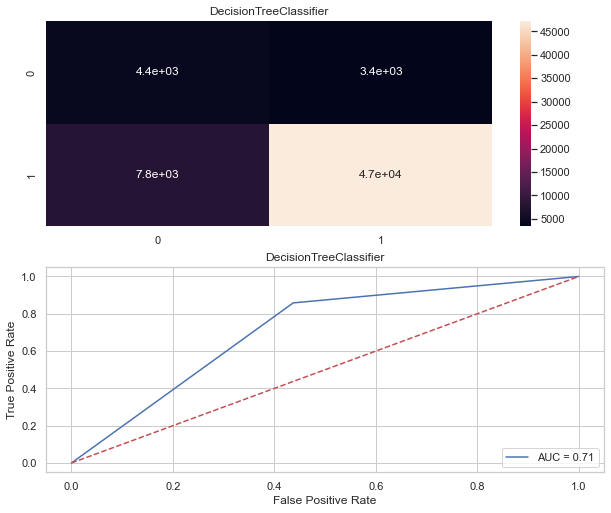

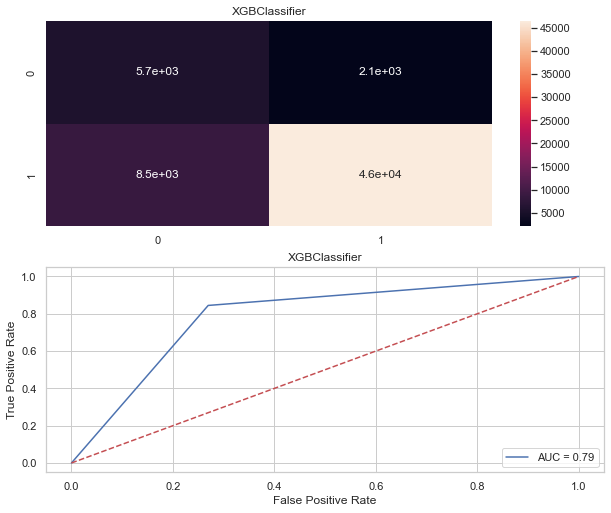

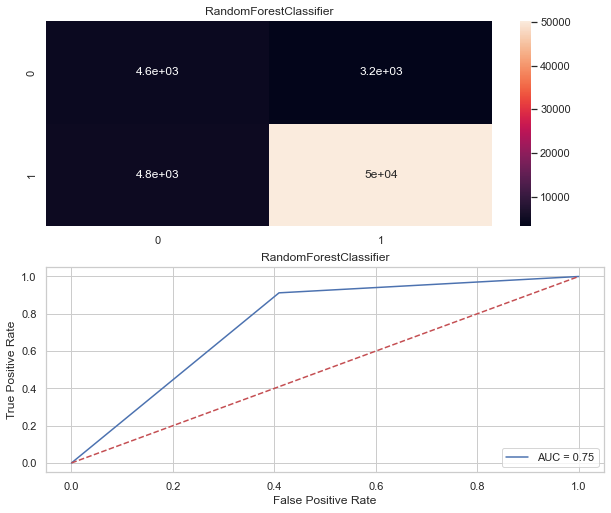

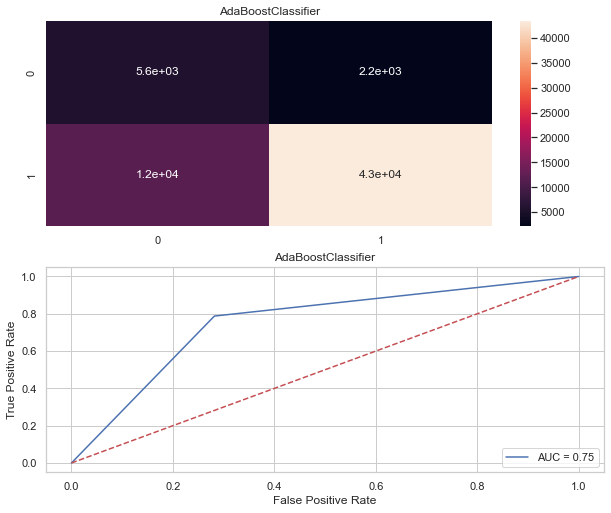

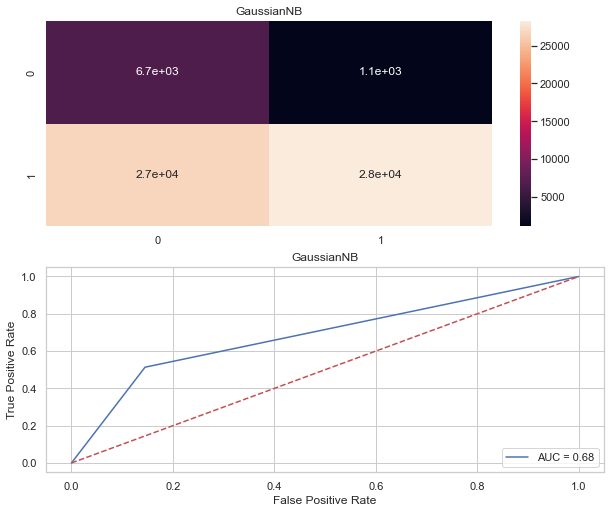

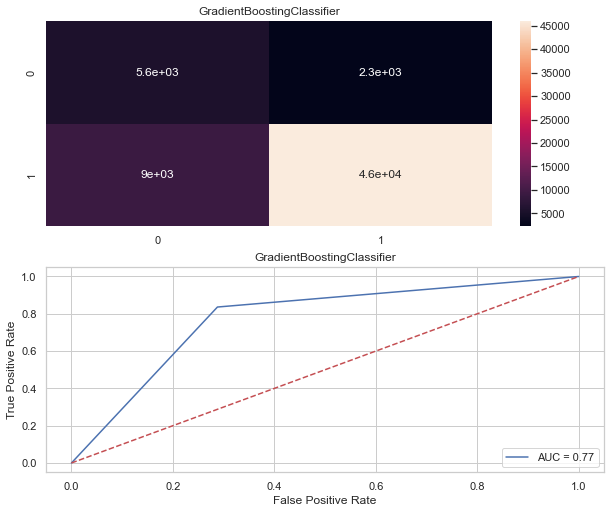

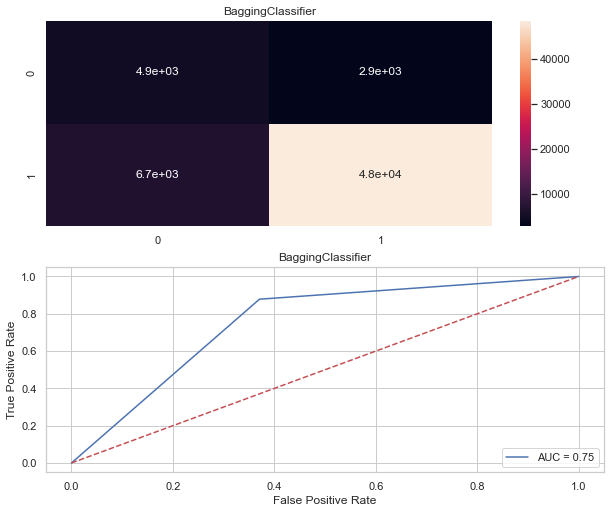

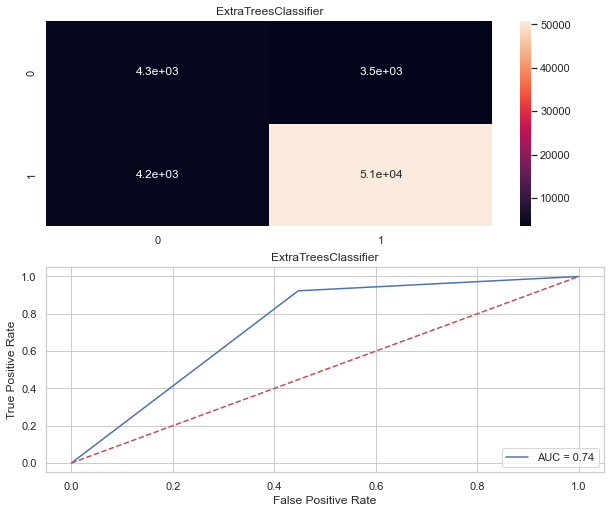

In [78]:
Model= []
score= []
cvs=[]
rocscore=[]
for name,model in models:
    print('*',name,'*')
    print('\n')
    Model.append(name)
    model.fit(x_train_ns,y_train_ns)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [79]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve':rocscore})
result 

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,78.469417,88.624567,76.251644
1,LogisticRegression,73.516969,87.451811,74.793095
2,DecisionTreeClassifier,82.149559,85.358219,71.062901
3,XGBClassifier,83.051306,89.676610,78.760122
4,RandomForestClassifier,87.219695,89.837399,75.155651
5,AdaBoostClassifier,77.912783,87.986660,75.300081
6,GaussianNB,55.618817,86.259979,68.423486
7,GradientBoostingClassifier,82.074812,89.020574,77.421222
8,BaggingClassifier,84.711664,88.943281,75.377643
9,ExtraTreesClassifier,87.699990,89.638918,73.807949


# We choose XGBClassifier as our final model because it is giving best rocscore

### Using GridSearchCV to find the best parameters in XGBClassifier

In [80]:
parameters={'n_estimators': [100, 250, 500], 'max_depth': [6,9,12], 'subsample':[0.9, 1.0]}
XGB=XGBClassifier()

In [81]:
clf=GridSearchCV(XGB, parameters, n_jobs=4)

In [82]:
clf.fit(x,y)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                       

In [83]:
print(clf.best_params_)

{'max_depth': 9, 'n_estimators': 100, 'subsample': 1.0}


In [84]:
#XGBClassifier with best parameters

XGB=XGBClassifier(max_depth=6,n_estimators=100,subsample=1.0,gamma=1)
XGB.fit(x_train_ns,y_train_ns)
XGB.score(x_train_ns,y_train_ns)
predXGB=XGB.predict(x_test)
print(accuracy_score(y_test,predXGB))
print(confusion_matrix(y_test,predXGB))
print(classification_report(y_test,predXGB))

0.8316581316199625
[[ 5721  2128]
 [ 8457 46572]]
              precision    recall  f1-score   support

           0       0.40      0.73      0.52      7849
           1       0.96      0.85      0.90     55029

    accuracy                           0.83     62878
   macro avg       0.68      0.79      0.71     62878
weighted avg       0.89      0.83      0.85     62878



In [85]:
#cross validate XGBClassifier accuracy

score=cross_val_score(XGB,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std:',score.std())

[0.89632386 0.89630001 0.895391   0.89682237 0.89846844]
Mean: 0.896661135436472
Std: 0.0010148641792470776


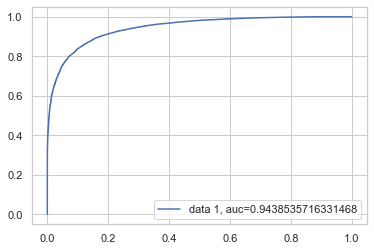

In [86]:
#plotting the roc auc curve

from sklearn import metrics
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

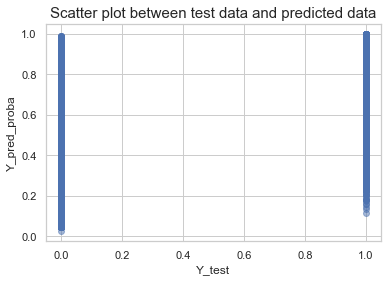

In [87]:
#Scatter plot between test data and prediction

plt.scatter(y_test,y_pred_proba, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred_proba")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

In [88]:
#saving our model

import joblib
joblib.dump(XGB,'XGB_MicroCreditDefaulter.csv')

['XGB_MicroCreditDefaulter.csv']

In [89]:
model=joblib.load('XGB_MicroCreditDefaulter.csv')

In [90]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0
 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 0 

### Conclusion:
    
We predicted the outcomes in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan using different Classification Models.
 
The best score of 0.90 was achieved using the best parameters of XGBClassifier through GridSearchCV though both random forest and gradient boosting models performed well too.